In [1]:
!pip install transformers tokenizers evaluate huggingface_hub --quiet

import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.9 MB/s eta 0:00:00


In [2]:
# from huggingface_hub import notebook_login
# notebook_login()

# Loading Model and Tokenizer

In [3]:
from transformers import TFAutoModelForSequenceClassification, PreTrainedTokenizerFast
import datasets

tokenizer = PreTrainedTokenizerFast.from_pretrained('raygx/GPT2-NepSA-T1')
tokenizer

PreTrainedTokenizerFast(name_or_path='raygx/GPT2-NepSA-T1', vocab_size=50000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'pad_token': '[PAD]'}, clean_up_tokenization_spaces=True)

In [4]:
from transformers import AutoConfig
from transformers import BertTokenizerFast

print("Loading Model 'distilgpt2")
using = 'gpt'

if using == 'gpt':
  model = TFAutoModelForSequenceClassification.from_pretrained('distilgpt2',
                                      n_head=4,n_layer=3,
                                      bos_token_id=tokenizer.bos_token_id,
                                      eos_token_id=tokenizer.eos_token_id,
                                      pad_token_id=tokenizer.pad_token_id,
                                      id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
                                      label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})

  
if using == 'bert':
  print("Loading Model 'distilbert-base-uncased")
  model = TFAutoModelForSequenceClassification.from_config(
      AutoConfig.from_pretrained(
          'distilbert-base-uncased',
          bos_token_id=tokenizer.bos_token_id,
          eos_token_id=tokenizer.eos_token_id,
          pad_token_id=tokenizer.pad_token_id,
          id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
          label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2}
        )
      )

  tokenizer = BertTokenizerFast.from_pretrained("raygx/GPT2-Nepali-Casual-LM")
  
model.resize_token_embeddings(len(tokenizer))
print(model.config)
print(model.summary())

Loading Model 'distilgpt2


Some layers from the model checkpoint at distilgpt2 were not used when initializing TFGPT2ForSequenceClassification: ['transformer/h_._5/mlp/c_proj/bias:0', 'transformer/h_._3/ln_1/beta:0', 'transformer/h_._4/ln_2/gamma:0', 'transformer/h_._3/mlp/c_proj/bias:0', 'transformer/h_._3/attn/c_attn/bias:0', 'transformer/h_._5/attn/c_proj/bias:0', 'transformer/h_._4/attn/c_proj/bias:0', 'transformer/h_._3/attn/c_proj/bias:0', 'transformer/h_._5/attn/c_attn/bias:0', 'transformer/h_._4/mlp/c_fc/bias:0', 'transformer/h_._3/attn/c_proj/weight:0', 'transformer/h_._4/attn/c_attn/weight:0', 'transformer/h_._3/mlp/c_fc/bias:0', 'transformer/h_._4/attn/c_proj/weight:0', 'transformer/h_._5/attn/c_proj/weight:0', 'transformer/h_._5/mlp/c_fc/bias:0', 'transformer/h_._5/ln_2/beta:0', 'transformer/h_._4/mlp/c_fc/weight:0', 'transformer/h_._5/mlp/c_proj/weight:0', 'transformer/h_._3/mlp/c_proj/weight:0', 'transformer/h_._3/ln_2/beta:0', 'transformer/h_._4/mlp/c_proj/bias:0', 'transformer/h_._3/ln_2/gamma:0'

GPT2Config {
  "_name_or_path": "distilgpt2",
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 1,
  "embd_pdrop": 0.1,
  "eos_token_id": 2,
  "id2label": {
    "0": "NEUTRAL",
    "1": "POSITIVE",
    "2": "NEGATIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 2,
    "NEUTRAL": 0,
    "POSITIVE": 1
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 4,
  "n_inner": null,
  "n_layer": 3,
  "n_positions": 1024,
  "pad_token_id": 3,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
 

In [5]:
from transformers import create_optimizer, AdamWeightDecay
import tensorflow as tf

optimizer = AdamWeightDecay(learning_rate=2e-6, weight_decay_rate=0.009)
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


# Data Loading and Preparation

In [6]:
data = datasets.load_dataset("raygx/NepCov19Tweets")
data = data.rename_columns({"Sentiment":"labels","Sentences":"text"})
data

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/33471 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/raygx___parquet/raygx--NepCov19Tweets-11ff376905985191/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 33471
    })
})

In [7]:
data = data.shuffle(999)
data = data['train'].train_test_split(test_size=0.2)
data

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 26776
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 6695
    })
})

In [8]:
def prepareLabels(row):
    if row['labels'] == -1:
        row['labels'] = 2
        
    return row

data = data.map(
        prepareLabels,
        num_proc=4)

print(data)

Map (num_proc=4):   0%|          | 0/26776 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/6695 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 26776
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 6695
    })
})


In [9]:
%%time

def preprocess_function(rows):
    return tokenizer(rows['text'],truncation=True)

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=2,
    remove_columns=data["train"].column_names,
)
tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])

tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
    name="labels",column=data['train']['labels']
)
tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
    name="labels",column=data['test']['labels']
)

tokenized_inputs

Tokenizing the data


Map (num_proc=2):   0%|          | 0/26776 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map (num_proc=2):   0%|          | 0/6695 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


CPU times: user 531 ms, sys: 259 ms, total: 790 ms
Wall time: 8.84 s


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 26776
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6695
    })
})

In [10]:
print(data['train'][:1])
print(tokenized_inputs['train'][:1]['input_ids'])
print(tokenizer.batch_decode(tokenized_inputs['train'][:1]['input_ids']))

{'labels': [1], 'text': ['कोभिड नोभेल कोरोना भाईरस को विश्वब्यापी माहामारीबाट आफु पनि बाँचौ र अरुलाई पनि बचाऔं नयाँ बर्ष को सम्पूर्णमा शुभकामना']}
[[1752, 2701, 18314, 3804, 26290, 364, 38933, 16126, 2975, 334, 2195, 301, 4157, 181, 96, 8827, 301, 11359, 9703, 723, 1461, 364, 2117, 252, 3693]]
['कोभिड नोभेल कोरोना भाईरस को विश्वब्यापी माहामारीबाट आफु पनि बाँचौ र अरुलाई पनि बचाऔं नयाँ बर्ष को सम्पूर्णमा शुभकामना']


In [11]:
from transformers import DataCollatorWithPadding

print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, 
                                        max_length=128,
                                        return_tensors="tf")

Initializing Data Collator


In [12]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2382: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


# Training and Evaluation

## Training **Batch 1**

In [13]:
%%time

n_epoch = 20
print("Training the model")
history = model.fit(x=tf_train_set, 
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
Epoch 1/20
1673/1673 [==============================] - 138s 76ms/step - loss: 1.0490 - val_loss: 0.9739
Epoch 2/20
1673/1673 [==============================] - 125s 75ms/step - loss: 0.9676 - val_loss: 0.9229
Epoch 3/20
1673/1673 [==============================] - 130s 77ms/step - loss: 0.9247 - val_loss: 0.8905
Epoch 4/20
1673/1673 [==============================] - 126s 75ms/step - loss: 0.8932 - val_loss: 0.8688
Epoch 5/20
1673/1673 [==============================] - 126s 75ms/step - loss: 0.8678 - val_loss: 0.8525
Epoch 6/20
1673/1673 [==============================] - 126s 75ms/step - loss: 0.8463 - val_loss: 0.8418
Epoch 7/20
1673/1673 [==============================] - 125s 75ms/step - loss: 0.8328 - val_loss: 0.8294
Epoch 8/20
1673/1673 [==============================] - 125s 74ms/step - loss: 0.8178 - val_loss: 0.8209
Epoch 9/20
1673/1673 [==============================] - 125s 75ms/step - loss: 0.8013 - val_loss: 0.8133
Epoch 10/20
1673/1673 [=============

<Axes: >

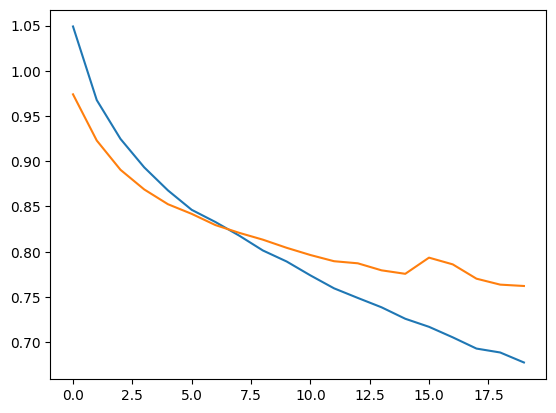

In [14]:
import seaborn

seaborn.lineplot(history.history['loss'])
seaborn.lineplot(history.history['val_loss'])

### Evaluation

In [17]:
%%time
from transformers import pipeline, TextClassificationPipeline

if using=='gpt':
  print("Getting Test Prediction")
  pipe = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,device=1)
  prediction = pipe(data['test']['text'])

  print("Prediction Label to Id")
  pred_labels = [model.config.label2id[x['label']] for x in prediction]
else:  
  print("Getting Test Prediction")
  pred_labels = [np.argmax(tf.nn.softmax(model(tf.constant(x)).logits)) for x in tokenized_inputs['test']['input_ids']]

actual_labels = data['test']['labels']

Getting Test Prediction
Prediction Label to Id
CPU times: user 6min 32s, sys: 4.11 s, total: 6min 36s
Wall time: 6min 38s


**Computing F1-Score, Precision, Recall and Accuracy of the Model**

In [18]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.2536189936860453
Precision-Score 0.67076896636639
Recall-Score 0.42135922330097086
accuracy_Score 0.42135922330097086


**Plotting Confusion Matrix**

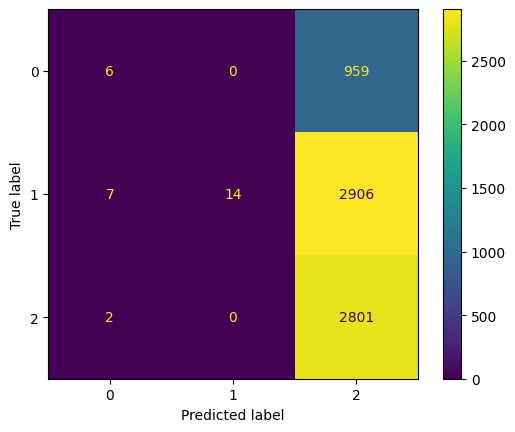

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=3).numpy())
cmd.plot()

**Pushing Model to Huggingface Hub**

In [ ]:
### Pushing Model to hub
# if using=='gpt':
#   model.push_to_hub("raygx/GPT2-NepSA-T1",commit_message="Training From Scratch:Distilgpt2;3L4H:Batch 1:Epoch 20; lr=2e-6")

## Training **Batch 2**

In [ ]:
%%time
n_epoch = 10
print("Training the model")
history = model.fit(x=tf_train_set, 
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
Epoch 1/10
   2/1673 [..............................] - ETA: 2:39 - loss: 0.7172

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2382: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


1673/1673 [==============================] - 126s 76ms/step - loss: 0.6678 - val_loss: 0.7656
Epoch 2/10
1673/1673 [==============================] - 125s 75ms/step - loss: 0.6566 - val_loss: 0.7640
Epoch 3/10
1673/1673 [==============================] - 126s 75ms/step - loss: 0.6505 - val_loss: 0.7585
Epoch 4/10
1673/1673 [==============================] - 125s 75ms/step - loss: 0.6374 - val_loss: 0.7608
Epoch 5/10
1673/1673 [==============================] - 129s 77ms/step - loss: 0.6306 - val_loss: 0.7621
Epoch 6/10
1673/1673 [==============================] - 125s 75ms/step - loss: 0.6232 - val_loss: 0.7632
Epoch 7/10
1673/1673 [==============================] - 129s 77ms/step - loss: 0.6154 - val_loss: 0.7678
Epoch 8/10
1673/1673 [==============================] - 126s 75ms/step - loss: 0.6096 - val_loss: 0.7666
Epoch 9/10
1673/1673 [==============================] - 125s 75ms/step - loss: 0.5958 - val_loss: 0.7680
Epoch 10/10
1673/1673 [==============================] - 125s 75ms

In [ ]:
import seaborn

seaborn.lineplot(history.history['loss'])
seaborn.lineplot(history.history['val_loss'])

### Evaluation

In [ ]:
%%time
from transformers import pipeline, TextClassificationPipeline

if using=='gpt':
  def batchPrediction(rows):
    pass

  print("Getting Test Prediction")
  pipe = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,device=1)
  prediction = pipe(data['test']['text'])

  print("Prediction Label to Id")
  pred_labels = [model.config.label2id[x['label']] for x in prediction]
else:  
  print("Getting Test Prediction")
  pred_labels = [np.argmax(tf.nn.softmax(model(tf.constant(x)).logits)) for x in tokenized_inputs['test']['input_ids']]

actual_labels = data['test']['labels']

**Computing F1-Score, Precision, Recall and Accuracy of the Model**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

**Plotting Confusion Matrix**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=3).numpy())
cmd.plot()

**Pushing Model to Huggingface Hub**

In [ ]:
# tokenizer.push_to_hub("raygx/GPT2-NepSA-T1")

In [ ]:
### Pushing Model to hub
# if using=='gpt':
#   model.push_to_hub("raygx/GPT2-NepSA-T1",commit_message="Training From Scratch:Distilgpt2;3L4H:Batch 1:Epoch 40")